In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !unzip "/content/drive/MyDrive/14828 Browser Security Project/result_zips/analysis_from5to12am.zip" -d "/content/drive/MyDrive/14828 Browser Security Project/DoubleX_Results"

In [4]:
# !rm -rf "/content/drive/MyDrive/14828 Browser Security Project/DoubleX_Results/__MACOSX"

In [5]:
ext_results_path = "/content/drive/MyDrive/14828 Browser Security Project/DoubleX_Results"
all_exts = os.listdir(ext_results_path)
print("Number of extensions: ", len(all_exts))

# all_exts_dict = {"id": all_exts}
# df = pd.DataFrame(all_exts_dict)
# df.to_csv("all_exts.csv")

Number of extensions:  1465


## Analysis: Dangers

In [6]:
def extract_dangers(dangers):
  if len(dangers) == 0:
    return None
  items = []  
  for _,v in dangers.items():
    items.append({'danger': v['danger'], 'value': v['value'], 'dataflow': bool(v['dataflow'])})
  return pd.DataFrame(items)

In [7]:
def add_danger(df, danger_obj):
  dangers = extract_dangers(danger_obj)
  if dangers is not None:
    return pd.concat([df, dangers])
  return df

In [8]:
%%capture 
df_cols = ['danger', 'value', 'dataflow']

df_cs_direct_dangers = pd.DataFrame(columns=df_cols)
df_cs_indirect_dangers = pd.DataFrame(columns=df_cols)
df_cs_exfiltration_dangers = pd.DataFrame(columns=df_cols)
df_bp_direct_dangers = pd.DataFrame(columns=df_cols)
df_bp_indirect_dangers = pd.DataFrame(columns=df_cols)
df_bp_exfiltration_dangers = pd.DataFrame(columns=df_cols)

In [9]:
%%capture 
for ext in all_exts:
  data = pd.read_json("{}/{}".format(ext_results_path, ext))
  df_cs_direct_dangers = add_danger(df_cs_direct_dangers, data.cs.direct_dangers)
  df_cs_indirect_dangers = add_danger(df_cs_indirect_dangers, data.cs.indirect_dangers)
  df_cs_exfiltration_dangers = add_danger(df_cs_exfiltration_dangers, data.cs.exfiltration_dangers)
  df_bp_direct_dangers = add_danger(df_bp_direct_dangers, data.bp.direct_dangers)
  df_bp_indirect_dangers = add_danger(df_bp_indirect_dangers, data.bp.indirect_dangers)
  df_bp_exfiltration_dangers = add_danger(df_bp_exfiltration_dangers, data.bp.exfiltration_dangers)

In [10]:
direct_dangers_count = df_cs_direct_dangers.shape[0] + df_bp_direct_dangers.shape[0]
print(f"content script direct dangers: {df_cs_direct_dangers.shape[0]}")
print(f"background script direct dangers: {df_bp_direct_dangers.shape[0]}")
print(f"total direct dangers: {direct_dangers_count}")

content script direct dangers: 1271
background script direct dangers: 588
total direct dangers: 1859


In [11]:
indirect_dangers_count = df_cs_indirect_dangers.shape[0] + df_bp_indirect_dangers.shape[0]
print(f"content script indirect dangers: {df_cs_indirect_dangers.shape[0]}")
print(f"background script indirect dangers: {df_bp_indirect_dangers.shape[0]}")
print(f"total indirect dangers: {indirect_dangers_count}")

content script indirect dangers: 637
background script indirect dangers: 519
total indirect dangers: 1156


In [12]:
exfiltration_dangers_count = df_cs_exfiltration_dangers.shape[0] + df_bp_exfiltration_dangers.shape[0]
print(f"content script exfiltration dangers: {df_cs_exfiltration_dangers.shape[0]}")
print(f"background script exfiltration dangers: {df_bp_exfiltration_dangers.shape[0]}")
print(f"total exfiltration dangers: {exfiltration_dangers_count}")

content script exfiltration dangers: 0
background script exfiltration dangers: 617
total exfiltration dangers: 617


In [13]:
df_cs_direct_dangers.head(10)

,danger,value,dataflow
0,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False
0,XMLHttpRequest.open,"XMLHttpRequest().open(d.method.toUpperCase(), ...",False
1,setTimeout,setTimeout(l),False
2,setTimeout,"x.slice.call({'arguments': {}, 0: '[None] argu...",False
3,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False
4,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False
5,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False
6,setTimeout,"setTimeout(t, 1)",False
7,setTimeout,"window.setTimeout(this.track_callback(i, this....",False
8,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False


In [14]:
pd.concat([df_cs_direct_dangers, df_bp_direct_dangers]).groupby(['danger']).size()

danger
XMLHttpRequest.open          83
document.write                8
downloads.download           17
eval                          7
scripting.executeScript     234
setInterval                 314
setTimeout                 1186
tabs.executeScript           10
dtype: int64

In [ ]:
dir_df = pd.concat([df_cs_direct_dangers, df_bp_direct_dangers])
sns.countplot(y=dir_df["danger"])

<Axes: xlabel='count', ylabel='danger'>

In [15]:
pd.concat([df_cs_indirect_dangers, df_bp_indirect_dangers]).groupby(['danger']).size()

danger
ajax                    51
fetch                  576
get                      9
post                     9
runtime.connect          2
runtime.sendMessage    509
dtype: int64

<Axes: xlabel='count', ylabel='danger'>

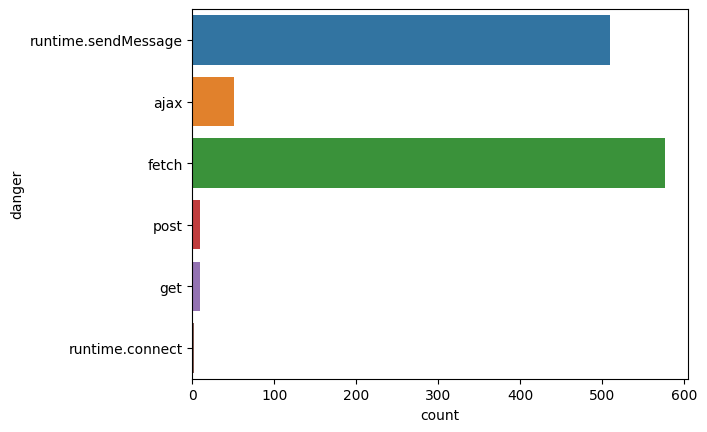

In [16]:
indir_df = pd.concat([df_cs_indirect_dangers, df_bp_indirect_dangers])
sns.countplot(y=indir_df["danger"])

In [17]:
pd.concat([df_cs_exfiltration_dangers, df_bp_exfiltration_dangers]).groupby(['danger']).size()

<ipython-input-17-db9295d078c1>:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  pd.concat([df_cs_exfiltration_dangers, df_bp_exfiltration_dangers]).groupby(['danger']).size()


danger
bookmarks.getTree      4
cookies.getAll        27
history.search         2
storage.local.get    355
storage.sync.get     218
topSites.get          11
dtype: int64

<ipython-input-18-572c4fe29dcc>:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  exfil_df = pd.concat([df_cs_exfiltration_dangers, df_bp_exfiltration_dangers])


<Axes: xlabel='count', ylabel='danger'>

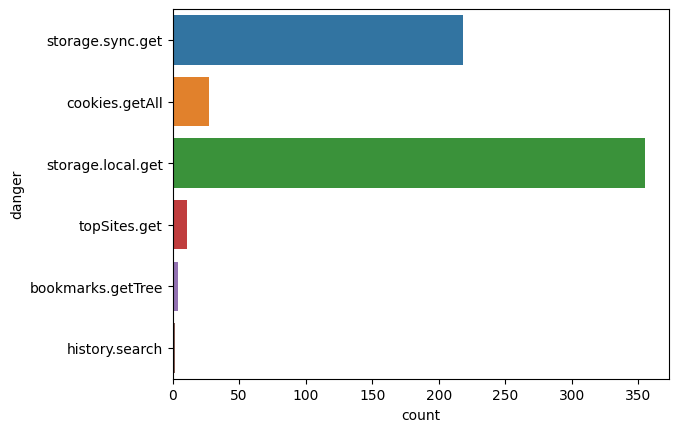

In [18]:
exfil_df = pd.concat([df_cs_exfiltration_dangers, df_bp_exfiltration_dangers])
sns.countplot(y=exfil_df["danger"])

## Analysis: Extensions

### Build Dataset

Combine the following:
1. Extension metadata
2. Manifest file analysis
3. DoubleX analysis

In [19]:
# !unzip "/content/drive/MyDrive/14828 Browser Security Project/result_zips/metadata.zip" -d "/content/drive/MyDrive/14828 Browser Security Project/Metadata_Results"

In [20]:
# !unzip "/content/drive/MyDrive/14828 Browser Security Project/result_zips/manifest_analysis.zip" -d "/content/drive/MyDrive/14828 Browser Security Project/Manifest_Analysis_Results"

In [39]:
ext_df_filepath = "/content/drive/MyDrive/14828 Browser Security Project/ext_df.csv"

In [44]:
%%capture
if not os.path.exists(ext_df_filepath):
    ext_df = pd.DataFrame()

    for i, ext_id in enumerate(all_exts):
        print("Creating row for extension:", i)

        # load JSON files
        metadata_filepath = f"/content/drive/MyDrive/14828 Browser Security Project/Metadata_Results/metadata/{ext_id}.json"
        manifest_analysis_filepath = f"/content/drive/MyDrive/14828 Browser Security Project/Manifest_Analysis_Results/manifest_analysis/{ext_id}.json"
        doublex_analysis_filepath = f"/content/drive/MyDrive/14828 Browser Security Project/DoubleX_Results/{ext_id}"

        if os.path.exists(metadata_filepath):
          with open(metadata_filepath) as f:
            metadata_dict = json.load(f)
        else:
          continue

        if os.path.exists(manifest_analysis_filepath):
          with open(manifest_analysis_filepath) as f:
            manifest_analysis_dict = json.load(f)
        else:
          continue

        if os.path.exists(doublex_analysis_filepath):
          with open(doublex_analysis_filepath) as f:
            doublex_analysis_dict = pd.read_json(f)
        else:
          continue

        # create row (dict) for extension
        ext_row = {
            "extension_id": str(metadata_dict["extension_id"]),
            "avg_rating": float(metadata_dict["avg_rating"]),
            "num_users_who_rated": int(metadata_dict["num_users_who_rated"]),
            "num_users_who_downloaded": int(metadata_dict["num_users_who_downloaded"]),
            "category": str(metadata_dict["category"]),
            "num_api_permissions": int(manifest_analysis_dict["num_api_permissions"]),
            "num_host_permissions": int(manifest_analysis_dict["num_host_permissions"]),
            "is_csp_declared": int(manifest_analysis_dict["is_csp_declared"]),
            "num_wars": int(manifest_analysis_dict["num_wars"]),
            "num_ext_conn": int(manifest_analysis_dict["num_ext_conn"])
        }

        cs_dangers = doublex_analysis_dict['cs']
        ext_row["num_cs_direct_dangers"] = len(cs_dangers['direct_dangers'].keys())
        ext_row["num_cs_indirect_dangers"] = len(cs_dangers['indirect_dangers'].keys())
        ext_row["num_cs_exfil_dangers"] = len(cs_dangers['exfiltration_dangers'].keys())

        bp_dangers = doublex_analysis_dict['bp']
        ext_row["num_bp_direct_dangers"] = len(bp_dangers['direct_dangers'].keys())
        ext_row["num_bp_indirect_dangers"] = len(bp_dangers['indirect_dangers'].keys())
        ext_row["num_bp_exfil_dangers"] = len(bp_dangers['exfiltration_dangers'].keys())

        # append row to dataset
        ext_df = ext_df.append(ext_row, ignore_index=True)
      
    # save ext_df for future loading
    ext_df.to_csv("/content/drive/MyDrive/14828 Browser Security Project/ext_df.csv")
else:
    ext_df = pd.read_csv(ext_df_filepath, index_col=0)

In [51]:
ext_df

,extension_id,avg_rating,num_users_who_rated,num_users_who_downloaded,category,num_api_permissions,num_host_permissions,is_csp_declared,num_wars,num_ext_conn,num_cs_direct_dangers,num_cs_indirect_dangers,num_cs_exfil_dangers,num_bp_direct_dangers,num_bp_indirect_dangers,num_bp_exfil_dangers
0,hfmgojlegmbjoacgdocldnbgndbehejc,0.0,0,5,Productivity,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,ifniehnojokofonkklceecajlecbcfjl,0.0,0,10,Developer Tools,2,0,1,0,0,1.0,3.0,0.0,0.0,0.0,1.0
2,ededkpbhbbdncjajeklocejfkedhhikm,0.0,0,3,Accessibility,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,eokcnpmhpilgomehaaboihllcgpmncko,0.0,0,382,Productivity,3,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,jnbmekkgllcampcfjkobpffkfglolekn,5.0,2,8,Productivity,4,1,0,4,0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,komooichefkcbdhhhicpplicceldpcmn,5.0,1,30,Social & Communication,5,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1460,phgkmeaegpeoaobbicikppbbidcljhok,0.0,0,12,Productivity,5,1,1,3,0,0.0,6.0,0.0,5.0,3.0,5.0
1461,oodgegammlfboachpohoiodepmifalke,5.0,2,3,Productivity,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1462,fafmeoecefijagoogbkipapmjdnmbkgi,0.0,0,33,Productivity,4,3,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0


### Exploratory Data Analysis

#### Extension Metadata

<Axes: xlabel='avg_rating', ylabel='Count'>

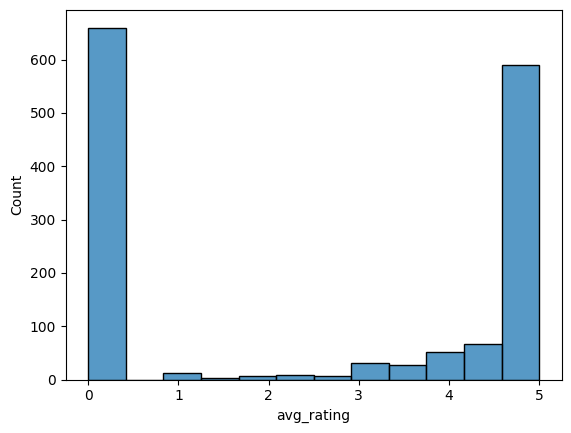

In [46]:
sns.histplot(data=ext_df, x="avg_rating")

<Axes: xlabel='count', ylabel='category'>

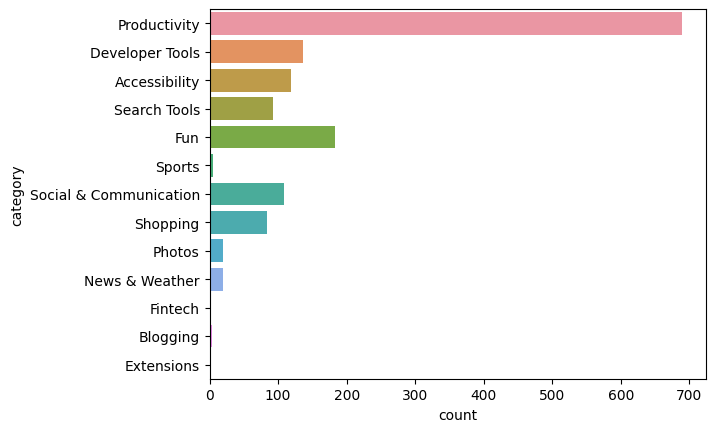

In [54]:
sns.countplot(data=ext_df, y="category")

#### Manifest File Analysis

Interesting observations:
1. Gifs autoplay for Google has 190 host permissions
  1. https://chrome.google.com/webstore/detail/gifs-autoplay-for-google/mfaepkdaodjclepbclabjbigjeohfdje
  1. hosts: all google domains

<Axes: xlabel='num_api_permissions', ylabel='Count'>

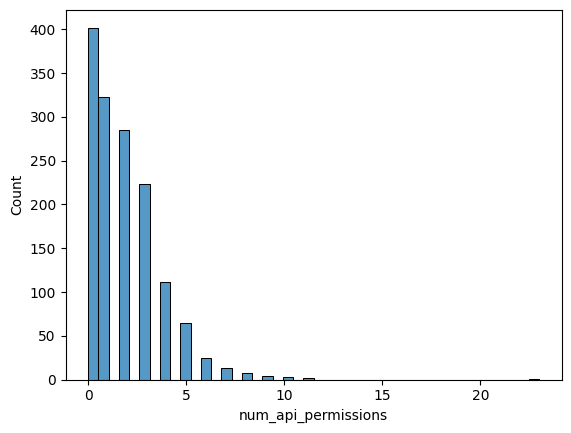

In [47]:
sns.histplot(data=ext_df, x="num_api_permissions")

Min 0
Max 190


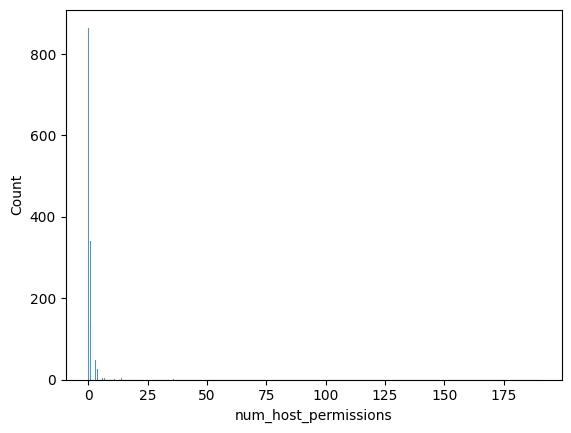

In [50]:
sns.histplot(data=ext_df, x="num_host_permissions")
print("Min", min(ext_df["num_host_permissions"]))
print("Max", max(ext_df["num_host_permissions"])) 

<Axes: xlabel='is_csp_declared', ylabel='count'>

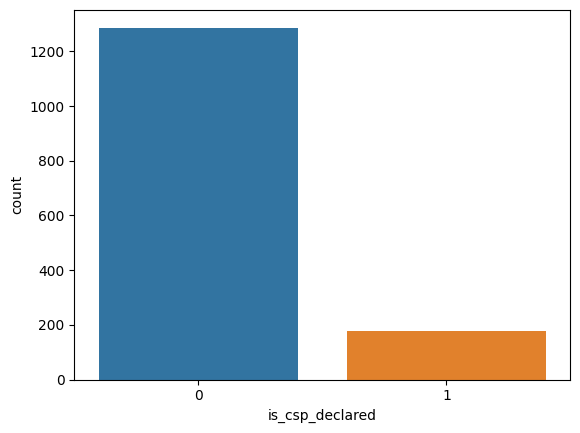

In [52]:
sns.countplot(data=ext_df, x="is_csp_declared")

<Axes: xlabel='num_wars', ylabel='Count'>

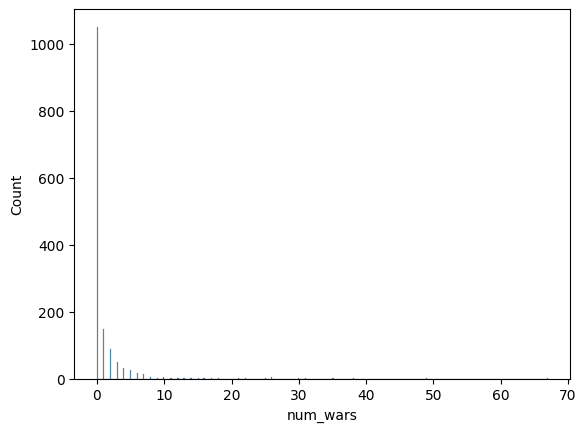

In [55]:
sns.histplot(data=ext_df, x="num_wars")

<Axes: xlabel='num_ext_conn', ylabel='count'>

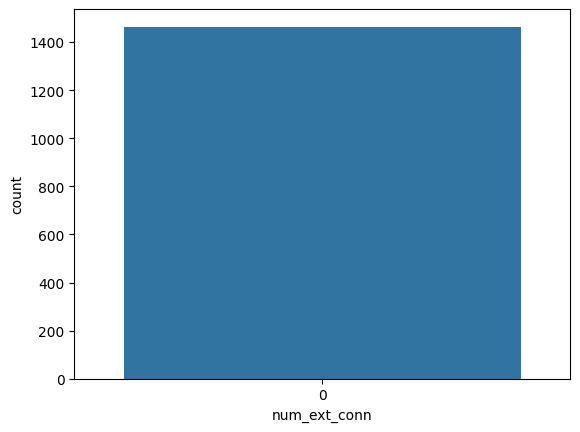

In [58]:
sns.countplot(data=ext_df, x="num_ext_conn")

#### DoubleX Analysis

Interesting observations:
1. Exfiltration dangers only from BP 

<Axes: xlabel='num_cs_direct_dangers', ylabel='Count'>

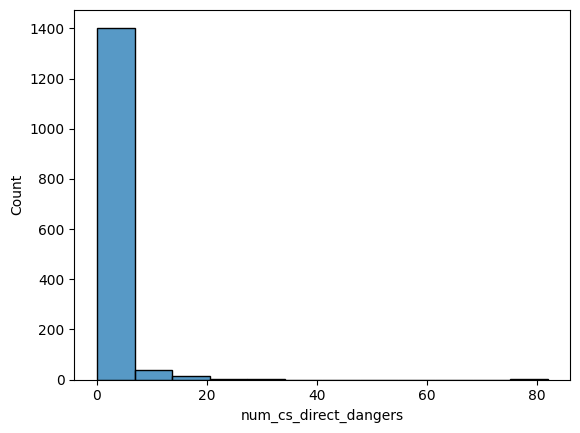

In [59]:
sns.histplot(data=ext_df, x="num_cs_direct_dangers")

<Axes: xlabel='num_cs_indirect_dangers', ylabel='Count'>

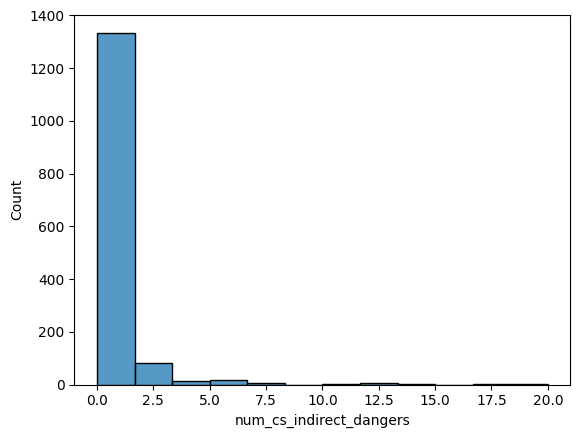

In [60]:
sns.histplot(data=ext_df, x="num_cs_indirect_dangers")

<Axes: xlabel='num_cs_exfil_dangers', ylabel='count'>

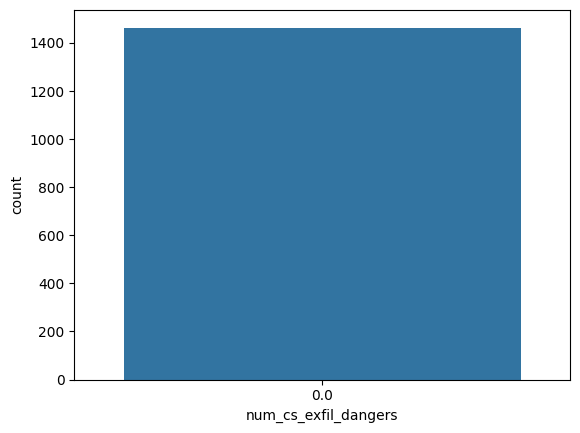

In [63]:
sns.countplot(data=ext_df, x="num_cs_exfil_dangers")

<Axes: xlabel='num_bp_direct_dangers', ylabel='Count'>

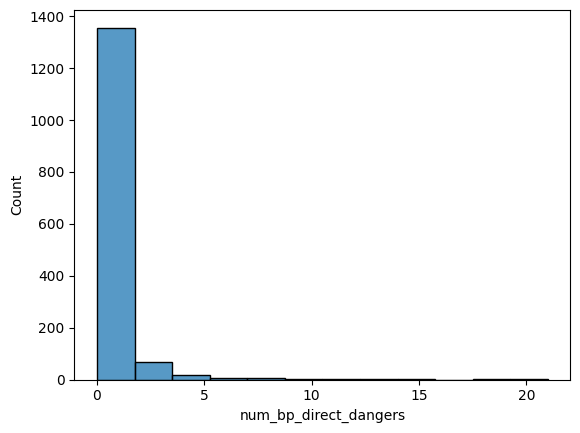

In [64]:
sns.histplot(data=ext_df, x="num_bp_direct_dangers")

<Axes: xlabel='num_bp_indirect_dangers', ylabel='Count'>

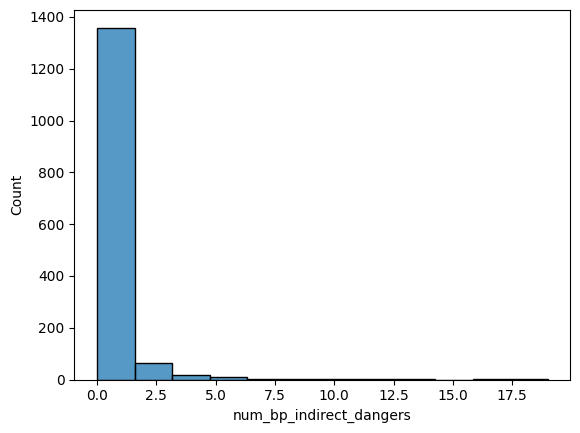

In [65]:
sns.histplot(data=ext_df, x="num_bp_indirect_dangers")

<Axes: xlabel='num_bp_exfil_dangers', ylabel='Count'>

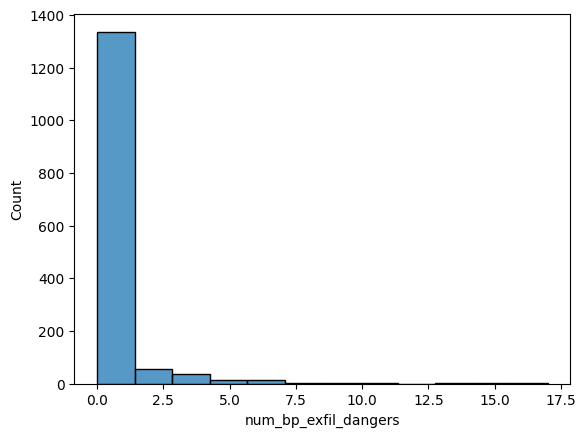

In [66]:
sns.histplot(data=ext_df, x="num_bp_exfil_dangers")

Feature Engineering

- need to normalize num user columns?
- average rating comes from number of reviewers only?

Analyze Dataset

- clustering?
- regression: category vs type of danger?